#### Load the Dataset

In [1]:
import pandas as pd
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.drop('id', axis=1, inplace=True)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


#### Remove NaN Values

In [3]:
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

#### EDA

[]

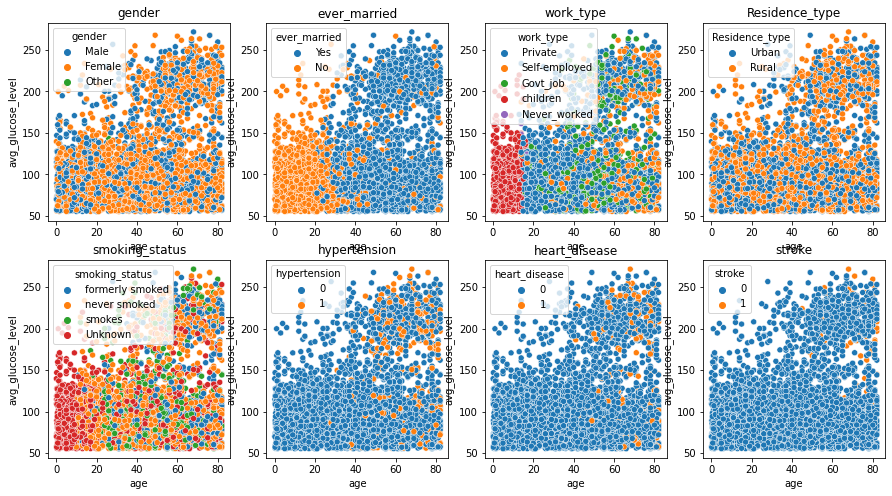

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(15,8)

cat_cols = df.select_dtypes('object').columns.tolist() + ['hypertension', 'heart_disease', 'stroke']
fig, axes = plt.subplots(2, 4)

k = 0
for i in range(len(axes)):
    for j in range(len(axes[0])):
        ax = axes[i][j]
        sns.scatterplot(ax=ax, x='age', y='avg_glucose_level', data=df, hue=cat_cols[k])
        ax.set_title(cat_cols[k])
        k+=1
        if k >= len(cat_cols): break
            
plt.plot()

[]

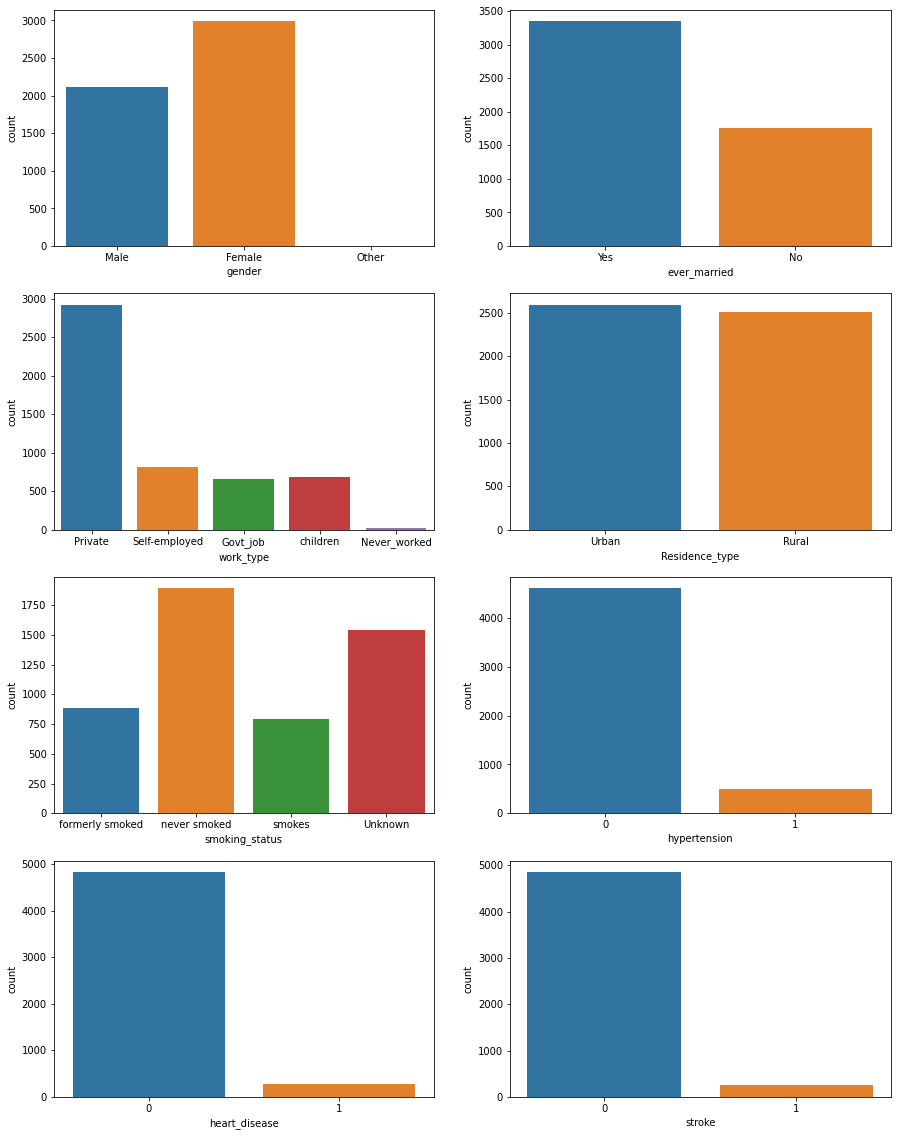

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(15,20)

cat_cols = df.select_dtypes('object').columns.tolist() + ['hypertension', 'heart_disease', 'stroke']
fig, axes = plt.subplots(4, 2) #v,h

k = 0
for i in range(len(axes)):
    for j in range(len(axes[0])):
        ax = axes[i][j]
        sns.countplot(ax=ax, x=cat_cols[k], data=df)
        k+=1
        if k >= len(cat_cols): break
            
plt.plot()

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 84.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 14.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 85.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 91.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 34.9% of the points cannot be placed; y

[]

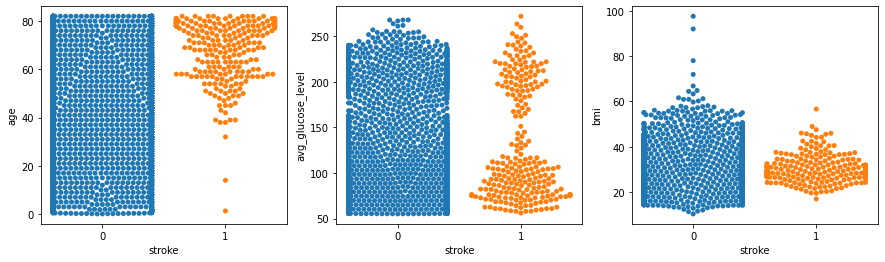

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=(15,4)

num_cols = ['age', 'avg_glucose_level', 'bmi']
fig, axes = plt.subplots(1, 3) #v,h

k = 0
for ax in axes:
    sns.swarmplot(ax=ax, y=num_cols[k], x='stroke', data=df)
            
plt.plot()

#### Convert Categorical Variables to Numerical Variables

In [7]:
from sklearn.preprocessing import OrdinalEncoder
cat_cols = df.select_dtypes('object').columns.tolist()
df[cat_cols] = OrdinalEncoder().fit_transform(df[cat_cols])
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,67.0,0,1,1.0,2.0,1.0,228.69,36.600000,1.0,1
1,0.0,61.0,0,0,1.0,3.0,0.0,202.21,28.893237,2.0,1
2,1.0,80.0,0,1,1.0,2.0,0.0,105.92,32.500000,2.0,1
3,0.0,49.0,0,0,1.0,2.0,1.0,171.23,34.400000,3.0,1
4,0.0,79.0,1,0,1.0,3.0,0.0,174.12,24.000000,2.0,1


#### Get Independent and Dependent Variables

In [8]:
X = df.drop('stroke', axis=1)
y = df['stroke']

#### Feature Correlation

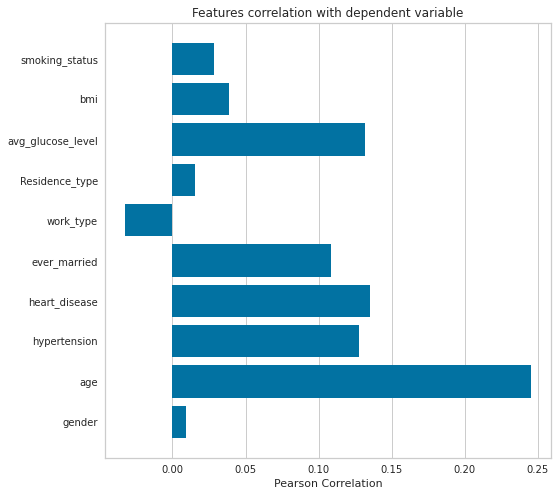

<AxesSubplot:title={'center':'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [10]:
import numpy as np
from yellowbrick.target import FeatureCorrelation

# Create a list of the feature names
features = np.array(X.columns)

# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=features)

plt.rcParams['figure.figsize']=(8,8)
visualizer.fit(X, y)     # Fit the data to the visualizer
visualizer.show()

#### Train Test Split

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

#### Model Training and Validation

In [14]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(random_state=seed)

In [15]:
# train model
model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [16]:
# make predictions
y_pred = model.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score
# get accuracy
acc = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f%%'%(acc*100))

Accuracy: 94.60%
